# Setup

In [3]:
url = 'http://ee64-34-125-38-181.ngrok.io'
# url = 'http://35.232.59.3:8080'

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from zipfile import ZipFile
%matplotlib inline

# Evaluation Functions

In [4]:
def recall_at_k(true_list,predicted_list,k=40):   
      
    return round(len([i for i in predicted_list[:k] if i in true_list]) / len(true_list), 3)

In [5]:
def precision_at_k(true_list,predicted_list,k=40):     

    return round(len([i for i in predicted_list[:k] if i in true_list]) / k, 3)

In [6]:
def r_precision(true_list,predicted_list):

    return round(len([i for i in predicted_list[:len(true_list)] if i in true_list]) / len(true_list), 3)

In [7]:
def reciprocal_rank_at_k(true_list,predicted_list,k=40):

    ele = next((i for i, v in enumerate(predicted_list) if v in true_list), None)
    if ele == None or ele > (k - 1):
      return 0.000
    else:
      return round(1 / (ele + 1), 3)

In [8]:
def f_score(true_list,predicted_list,k=40):
    
    precision = precision_at_k(true_list,predicted_list,k)
    recall = recall_at_k(true_list,predicted_list,k)
    if precision == 0 and recall == 0:
      return 0
    else:
      return round((2 * precision * recall) / (precision + recall), 3)

In [9]:
def average_precision(true_list, predicted_list, k=40):
    true_set = frozenset(true_list)
    predicted_list = predicted_list[:k]
    precisions = []
    for i,doc_id in enumerate(predicted_list):        
        if doc_id in true_set:
            prec = (len(precisions)+1) / (i+1)            
            precisions.append(prec)
    if len(precisions) == 0:
        return 0.0
    return round(sum(precisions)/len(precisions),3)

In [10]:
def evaluate(true_relevancy,predicted_relevancy,k,print_scores=True):   

    recall_lst = []
    precision_lst = []
    f_score_lst = []
    r_precision_lst = []
    reciprocal_rank_lst = []
    avg_precision_lst = []
    metrices = {'recall@k':recall_lst,
                'precision@k':precision_lst,
                'f_score@k': f_score_lst,
                'r-precision': r_precision_lst,
                'MRR@k':reciprocal_rank_lst,
                'MAP@k':avg_precision_lst}

    for query, ground_true in true_relevancy:  
      predicted = predicted_relevancy[query]

      recall_lst.append(recall_at_k(ground_true,predicted,k=k))
      precision_lst.append(precision_at_k(ground_true,predicted,k=k))
      f_score_lst.append(f_score(ground_true,predicted,k=k))
      r_precision_lst.append(r_precision(ground_true,predicted))
      reciprocal_rank_lst.append(reciprocal_rank_at_k(ground_true,predicted,k=k))
      avg_precision_lst.append(average_precision(ground_true,predicted,k=k))

    if print_scores:
        for name,values in metrices.items():
                print(name,sum(values)/len(values))

    return metrices

In [11]:
def plot_metric_different_quieries(true_relevancy,predicted_relevancy,metrices_names,k):

    for metric_name in metrices_names:
      met = evaluate(true_relevancy,predicted_relevancy,k=k,print_scores=False)
      met_list = met[metric_name]
      plt.xlabel("Queries")
      plt.ylabel("Metric")
      plt.title(metric_name)
      plt.plot([i+1 for i in range(len(met_list))], met_list)
      plt.show()

# Test PageRank and PageViews

In [44]:
import requests
from time import time

try:
  res = requests.post(url + '/get_pageview', json=[1, 3434750, 713, 1], timeout=35)
  if res.status_code == 200:
    pred_wids = res.json()
    print(pred_wids)
except:
  pass

try:
  res = requests.post(url + '/get_pagerank', json=[1, 3434750, 713, 1], timeout=35)
  if res.status_code == 200:
    pred_wids = res.json()
    print(pred_wids)
except:
  pass

[1559062, 14347]
[9913.72878216078, 13.387949399744079]


# Test all queries with MAP

In [12]:
import json

with open('queries_train.json', 'rt') as f:
  queries = json.load(f)

In [14]:
import pickle

with open("dt/dt.pkl", 'rb') as f:
    dt = pickle.load(f)

In [71]:
a = {k:[(id,dt.get(id, 'None')) for id in v] for k, v in queries.items()}

In [215]:
print(a['data science'])
#print(len([t for id, t in a['data science'] if (('data' in t or 'Data' in t) and ('Science' in t or 'science' in t))]))

[(35458904, 'Data science'), (2720954, 'Data analysis'), (54415758, 'Master in Data Science'), (233488, 'Machine learning'), (12487489, 'Data wrangling'), (48364486, 'Berkeley Institute for Data Science'), (487132, 'Analytics'), (416589, 'Exploratory data analysis'), (27051151, 'Big data'), (66414222, 'Data Science and Predictive Analytics'), (18985040, 'Data'), (4141563, 'Predictive analytics'), (376707, 'R (programming language)'), (67092078, 'Women in Data Science Initiative'), (61624594, 'The Center of Applied Data Science'), (59591015, 'Faculty (company)'), (49681, 'Ontology (information science)'), (55052729, 'New York University Center for Data Science'), (31663650, 'Kaggle'), (35757264, 'Prescriptive analytics'), (63995662, 'ODSC'), (3461736, 'Data visualization'), (56499662, 'Data science competition platform'), (43003632, 'Anaconda (Python distribution)'), (26685, 'Statistics'), (10147369, 'Business analytics'), (24932989, 'Data analysis techniques for fraud detection'), (669

In [197]:
token = 'dim sum'
o = [(id, dt[id]) for id in pred_wids[token] if id not in [id for id, t in a[token]]] # חזרו ולא רלוונטים
b = [(id, t) for id, t in a[token] if id in pred_wids[token]] # רלוונטים שחזרו
c = [(id, t) for id, t in a[token] if id not in pred_wids[token]] # רלוונטים שלא חזרו
selected = o
print(len(selected))
print(selected)

93
[(44592399, 'Sum/One'), (40457608, 'Dim Seqerlu'), (30715304, 'Sum of Parts'), (41794840, 'Dim Zelleh'), (61741917, 'Dim, Chishminsky District, Republic of Bashkortostan'), (60794114, 'Dim, Alsheyevsky District, Republic of Bashkortostan'), (59287149, 'Dim, Amur Oblast'), (41914889, 'Kuh Dim'), (37185041, 'Jacobsthal sum'), (41914588, 'Jama Zehi Kuh Dim'), (41943658, 'Kushat-e Sum'), (40791119, 'Dim Qeshlaq-e Olya'), (54730956, 'Ego Sum (comics)'), (23263286, 'Dim (album)'), (38759980, 'The Summing Up'), (37775322, 'Sar Rig-e Sum'), (23595690, 'Dim Mak (disambiguation)'), (13433185, 'Burst dimming'), (25678425, 'Sum certain'), (31708304, "Abel's sum formula"), (37184509, 'Brewer sum'), (66623943, 'Murasugi sum'), (62738659, 'The Sum of Us (disambiguation)'), (42150694, 'Sum and Substance'), (25456938, 'Dim Dam'), (38076137, 'Between the Dim & the Dark'), (6079710, 'Today Bandha Ghorar Dim'), (63155411, 'Chung Sum Wai'), (20619194, 'Summing localization'), (52110995, 'Sum Ronghang'),

In [19]:
import requests
from time import time
url = 'http://97fd-35-196-170-248.ngrok.io'
qs_res = []
pred_wids = {}
sum_duration = 0
map25 = True
duration35 = True
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search', {'query': q}, timeout=35)
    duration = time() - t_start
    sum_duration += duration
    if res.status_code == 200:
      pred_wids[q] = [tup[0] for tup in res.json()]
      ap = average_precision(true_wids, pred_wids[q])
      if ap < 0.25: map25 = False 
  except:
    pass
  
  if duration == None: duration35 = False
  qs_res.append((q, duration, ap))

In [20]:
print("Duration < 35s : " + str(duration35))
print("AP@40 > 0.25   : " + str(map25))
print("AVG Duration   : " + str(sum_duration/len(queries)) + "\n")
qs_res

Duration < 35s : True
AP@40 > 0.25   : False
AVG Duration   : 0.5181128501892089



[('python', 0.09633135795593262, 0.65),
 ('data science', 0.7165863513946533, 0.176),
 ('migraine', 0.07227778434753418, 0.932),
 ('chocolate', 0.08890390396118164, 0.511),
 ('how to make pasta', 1.0046472549438477, 0.648),
 ('Does pasta have preservatives?', 0.24970769882202148, 0.185),
 ('how google works', 1.7372782230377197, 0.677),
 ('what is information retrieval', 0.5993461608886719, 0.491),
 ('NBA', 0.10482096672058105, 0.25),
 ('yoga', 0.08190584182739258, 0.638),
 ('how to not kill plants', 0.7072999477386475, 0.247),
 ('masks', 0.11913895606994629, 0.52),
 ('black friday', 0.5825114250183105, 0.441),
 ('why do men have nipples', 0.42606139183044434, 0.704),
 ('rubber duck', 0.1282811164855957, 1.0),
 ('michelin', 0.08851742744445801, 0.379),
 ('what to watch', 0.23193955421447754, 0.538),
 ('best marvel movie', 1.1016850471496582, 0.298),
 ('how tall is the eiffel tower', 0.3053426742553711, 0.795),
 ('where does vanilla flavoring come from', 0.6831676959991455, 0.65),
 ('be

recall@k 0.14880000000000002
precision@k 0.30416666666666675
f_score@k 0.19893333333333338
r-precision 0.22346666666666665
MRR@k 0.7325333333333333
MAP@k 0.5177666666666666


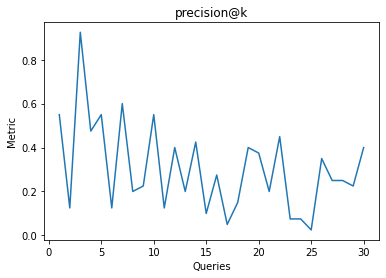

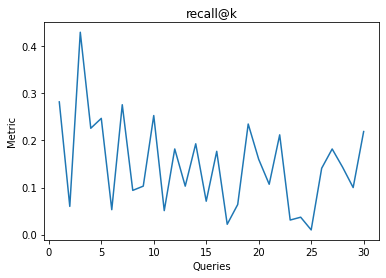

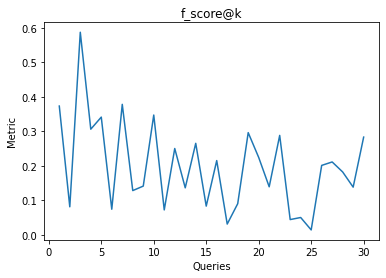

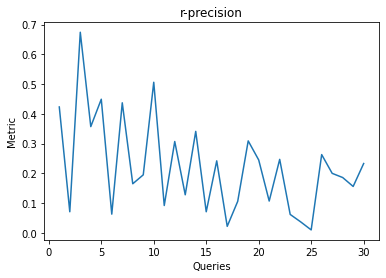

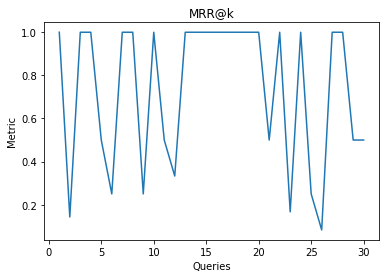

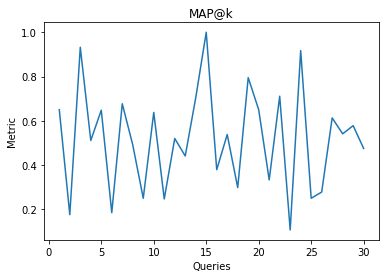

In [21]:
evaluate(queries.items(),pred_wids,k=40,print_scores=True)
plot_metric_different_quieries(queries.items(),pred_wids,['precision@k','recall@k','f_score@k','r-precision','MRR@k','MAP@k'],k=40)